# Preprocesamiento

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
#Se cargan los datos de los archivos csv
lista=pd.read_csv('lista.csv',sep=',')
Lista_R=pd.read_csv('Lista_R.csv',sep=',')

In [109]:
X_categoric = Lista_R[['room_type']].values
X_categoric

array([['Private room'],
       ['Private room'],
       ['Private room'],
       ...,
       ['Entire home/apt'],
       ['Private room'],
       ['Private room']], dtype=object)

In [110]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
X_categoric_onehot = enc.fit_transform(X_categoric) 
print(X_categoric_onehot.shape)
print(type(X_categoric_onehot))

(15059, 4)
<class 'numpy.ndarray'>


In [111]:
dfOH = pd.DataFrame (X_categoric_onehot, columns = ['Entire home/apt','Hotel room','Private room','Shared room'])

In [112]:
dfOH

,Entire home/apt,Hotel room,Private room,Shared room
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
15054,0.0,0.0,1.0,0.0
15055,0.0,0.0,1.0,0.0
15056,1.0,0.0,0.0,0.0
15057,0.0,0.0,1.0,0.0


In [113]:
Lista_R.reset_index(inplace=True)

In [114]:
full=pd.concat([Lista_R,dfOH],axis=1)

In [115]:
full=full.drop(['property_type'	,'room_type'],axis=1)

In [116]:
from sklearn.preprocessing import MinMaxScaler
#Normalizar
#Se crea el normalizador
normalizador = MinMaxScaler()
#Se ajusta los datos requeridos
normalizador.fit_transform(full[['price']])
full[['price']] = normalizador.transform(full[['price']])

In [117]:
# Crear el normalizador para realizar la transformación inversa
normalizador2 = MinMaxScaler()

# Ajustar y transformar los datos
x= normalizador2.fit_transform(Lista_R[['price']])

# Realizar la transformación inversa
y = normalizador2.inverse_transform(full[['price']])

In [118]:
#se guardan los datos en un archivo csv
full.to_csv('full.csv',index=False)

# Modelos

In [119]:
full.drop(['source','index'],axis=1,inplace=True)

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

X, y = full.drop(['price'],axis=1), full['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) 


In [121]:
from sklearn import metrics
from scipy import stats

def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

## Regresion Lineal Múltiple

---
Un modelo de regresión lineal múltiple es un modelo estadístico versátil para evaluar las relaciones entre un destino continuo y los predictores.

Tomado de: https://www.ibm.com/docs/es/cognos-analytics/11.1.0?topic=tests-multiple-linear-regression 


In [125]:

modelLR = LinearRegression()
kf = KFold(n_splits=5, shuffle=True,random_state=110)
c=cross_val_score(modelLR, X_train, y_train,
                cv=kf, 
                scoring='r2')
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
print(c)      
print(np.mean(c))
print(f'Coeficiente de Determinación usando score:, {modelLR.score(X_test, y_test):.4f}')
print(f'Coeficiente de Determinación con r2_score:, {r2_score(y_test, y_pred):.4f}')

[0.43737573 0.49389813 0.47407299 0.47618414 0.50538479]
0.4773831559469167
Coeficiente de Determinación usando score:, 0.4955
Coeficiente de Determinación con r2_score:, 0.4955


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.1,0.02,0.14,0.496,0.499,0.5,0.48


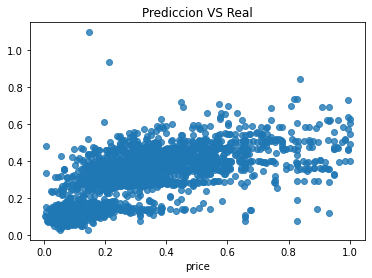

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


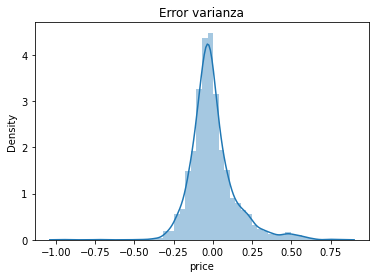

In [126]:
prediction_test = modelLR.predict(X_test)
prediction_train = modelLR.predict(X_train)
        
    
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

# Modelos mejorados
A continuacion se presentan modelos mas complejos que el modelo de regresion lineal multiple.

## XGboost

---
Este algoritmo se caracteriza por obtener buenos resultados de predicción con relativamente poco esfuerzo, en muchos casos equiparables o mejores que los devueltos por modelos más complejos computacionalmente, en particular para problemas con datos heterogéneos.

XGBoost es una herramienta muy útil para un data scientist y cuenta con implementaciones para diferentes lenguajes y entornos de programación.

Tomado de: https://medium.com/@jboscomendoza/xgboost-en-r-398e7c84998e


In [ ]:
import xgboost as xgb
from sklearn.metrics import  mean_squared_error, r2_score


model = xgb.XGBRegressor()
c=cross_val_score(model, X, y, 
                cv=kf,
                scoring='r2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Coeficiente de Determinación usando score:, {model.score(X_test, y_test):.4f}')
print(f'Coeficiente de Determinación con r2_score:, {r2_score(y_test, y_pred):.4f}')

Coeficiente de Determinación usando score:, 0.5867
Coeficiente de Determinación con r2_score:, 0.5867


In [ ]:
print(c)
print(np.mean(c))

[0.57377344 0.57794721 0.60284104 0.59258876 0.59890422]
0.5892109340471939


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.09,0.02,0.13,0.44,0.31,0.59,0.8


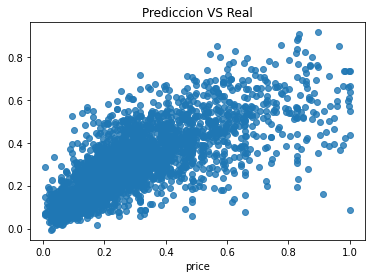

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


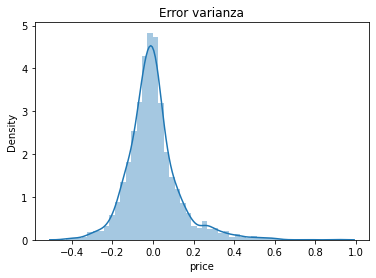

In [ ]:
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)
        
    
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

## Random Forest

---
Es un método versátil de aprendizaje automático capaz de realizar tanto tareas de regresión como de clasificación. También lleva a cabo métodos de reducción dimensional, trata valores perdidos, valores atípicos y otros pasos esenciales de exploración de datos. Es un tipo de método de aprendizaje por conjuntos, donde un grupo de modelos débiles se combinan para formar un modelo poderoso.

Tomado de: https://aprendeia.com/aprendizaje-supervisado-random-forest-classification/ 

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators = 500)
c=cross_val_score(model, X, y, 
                cv=kf,
                scoring='r2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(c)
print(np.mean(c))
print(f'Coeficiente de Determinación usando score:, {model.score(X_test, y_test):.4f}')
print(f'Coeficiente de Determinación con r2_score:, {r2_score(y_test, y_pred):.4f}')

[0.58871123 0.57401432 0.61117955 0.6067315  0.59594925]
0.5953171680288756
Coeficiente de Determinación usando score:, 0.5975
Coeficiente de Determinación con r2_score:, 0.5975


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.09,0.02,0.13,0.434,0.164,0.6,0.95


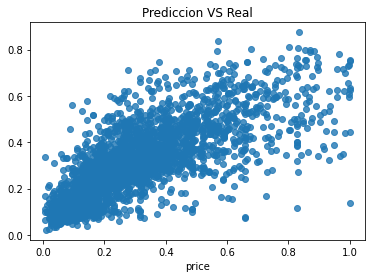

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


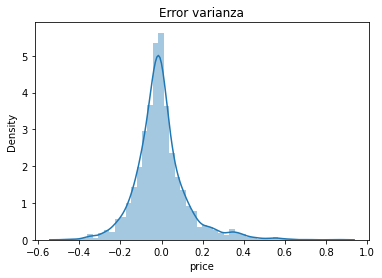

In [ ]:
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)
        
    
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

# Elección modelos

Después de ver el desempeño de los modelos, se eligen Random Forest y  XGboost, por lo cual se ajustará el df y se usarán técnicas de ML para encontrar los mejores hiperparametros con el fin de generar una mejor predicción

In [ ]:
full

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
0,40.457240,-3.676880,2,1.0,1.0,0.280822,4,1125,4.87,0.0,0.0,1.0,0.0
1,40.403810,-3.741300,1,1.0,1.0,0.078767,4,40,4.58,0.0,0.0,1.0,0.0
2,40.389750,-3.690180,1,1.0,1.0,0.071918,3,1125,4.71,0.0,0.0,1.0,0.0
3,40.414760,-3.704180,2,1.0,2.0,0.486301,5,180,4.63,1.0,0.0,0.0,0.0
4,40.412590,-3.701050,2,1.0,1.0,0.157534,3,730,4.38,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,40.431430,-3.676130,1,1.0,1.0,0.082192,1,150,5.00,0.0,0.0,1.0,0.0
15055,40.470997,-3.579028,1,1.0,1.0,0.109589,1,365,4.00,0.0,0.0,1.0,0.0
15056,40.436076,-3.702151,4,2.0,3.0,0.287671,1,1125,5.00,1.0,0.0,0.0,0.0
15057,40.496844,-3.686277,2,1.0,1.0,0.130137,1,365,5.00,0.0,0.0,1.0,0.0


In [ ]:
full2=full.drop([	'minimum_nights',	'maximum_nights'],axis=1)

In [ ]:
full2.corr()

,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
latitude,1.000000,0.267973,-0.013339,0.001551,0.006071,0.047915,0.021161,0.023247,0.007696,-0.026024,0.004981
longitude,0.267973,1.000000,-0.043615,-0.009383,-0.022999,-0.080702,0.018406,-0.074317,-0.007219,0.082315,-0.023704
accommodates,-0.013339,-0.043615,1.000000,0.673382,0.725073,0.626658,-0.008183,0.575879,-0.044616,-0.560954,-0.063404
bedrooms,0.001551,-0.009383,0.673382,1.000000,0.629466,0.478969,-0.003327,0.320748,-0.039630,-0.302861,-0.064596
beds,0.006071,-0.022999,0.725073,0.629466,1.000000,0.450192,-0.004393,0.342644,-0.034084,-0.392541,0.206319
price,0.047915,-0.080702,0.626658,0.478969,0.450192,1.000000,0.030122,0.575445,0.028594,-0.559242,-0.116459
review_scores_rating,0.021161,0.018406,-0.008183,-0.003327,-0.004393,0.030122,1.000000,0.015889,-0.003617,-0.006928,-0.034966
Entire home/apt,0.023247,-0.074317,0.575879,0.320748,0.342644,0.575445,0.015889,1.000000,-0.103259,-0.957884,-0.159134
Hotel room,0.007696,-0.007219,-0.044616,-0.039630,-0.034084,0.028594,-0.003617,-0.103259,1.000000,-0.053905,-0.008955
Private room,-0.026024,0.082315,-0.560954,-0.302861,-0.392541,-0.559242,-0.006928,-0.957884,-0.053905,1.000000,-0.083073


In [ ]:
full2

,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
0,40.457240,-3.676880,2,1.0,1.0,0.280822,4.87,0.0,0.0,1.0,0.0
1,40.403810,-3.741300,1,1.0,1.0,0.078767,4.58,0.0,0.0,1.0,0.0
2,40.389750,-3.690180,1,1.0,1.0,0.071918,4.71,0.0,0.0,1.0,0.0
3,40.414760,-3.704180,2,1.0,2.0,0.486301,4.63,1.0,0.0,0.0,0.0
4,40.412590,-3.701050,2,1.0,1.0,0.157534,4.38,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15054,40.431430,-3.676130,1,1.0,1.0,0.082192,5.00,0.0,0.0,1.0,0.0
15055,40.470997,-3.579028,1,1.0,1.0,0.109589,4.00,0.0,0.0,1.0,0.0
15056,40.436076,-3.702151,4,2.0,3.0,0.287671,5.00,1.0,0.0,0.0,0.0
15057,40.496844,-3.686277,2,1.0,1.0,0.130137,5.00,0.0,0.0,1.0,0.0


In [ ]:
X, y = full2.drop(['price'],axis=1), full2['price']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25)

In [ ]:

model = RandomForestRegressor(n_estimators = 500)

model.fit(X_train, y_train)


pred_train = model.predict(X_train)


pred_val = model.predict(X_val)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))


Training MSE: 0.0025
Validation MSE: 0.0194

Training r2: 0.9415
Validation r2: 0.5239


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.09,0.02,0.13,0.451,0.17,0.55,0.94


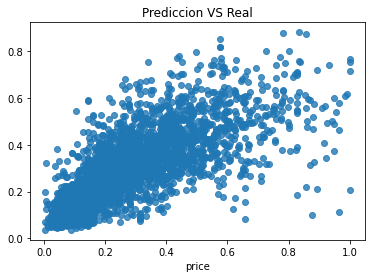

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


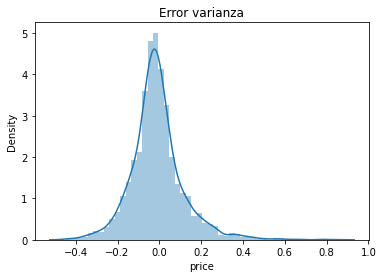

In [ ]:
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)
        
    
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

xgbcv = xgb.XGBRegressor(n_jobs = -1, verbose = 10, verbosity = 1, n_estimators = 50, min_child_weight=5)

gparameters = {'learning_rate': [0.13, 0.17, 0.21], 'max_depth': [25, 27, 30],
               'reg_lambda': [0.5, 0.9, 1.3]}

GridSearch = GridSearchCV(xgbcv, param_grid = gparameters, scoring='r2',
                          verbose = 10, cv = 3)

GridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.5 ................
[00:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.5, score=0.507, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.5 ................
[00:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.5, score=0.514, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.5 ................
[00:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.5, score=0.489, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.9 ................
[00:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.9, score=0.509, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.9 ................
[00:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.9, score=0.507, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=0.9 ................
[00:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=0.9, score=0.499, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=1.3 ................
[00:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=1.3, score=0.512, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=1.3 ................
[00:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.8s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=1.3, score=0.508, total=   0.7s
[CV] learning_rate=0.13, max_depth=25, reg_lambda=1.3 ................
[00:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=25, reg_lambda=1.3, score=0.493, total=   0.7s
[CV] learning_rate=0.13, max_depth=27, reg_lambda=0.5 ................
[00:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.2s remaining:    0.0s


[CV]  learning_rate=0.13, max_depth=27, reg_lambda=0.5, score=0.509, total=   0.8s
[CV] learning_rate=0.13, max_depth=27, reg_lambda=0.5 ................
[00:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  learning_rate=0.13, max_depth=27, reg_lambda=0.5, score=0.508, total=   0.7s
[CV] learning_rate=0.13, max_depth=27, reg_lambda=0.5 ................
[00:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.0min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...one, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=5, missing=nan,
                                    monotone_constraints=None, n_estimators=50,
             

In [ ]:
GridSearch.best_params_

{'learning_rate': 0.13, 'max_depth': 25, 'reg_lambda': 0.9}

In [ ]:
y_pred = GridSearch.predict(X_test)
print(f'El coeficiente de determinación (partición de prueba): {r2_score(y_test, y_pred):.6f}')


El coeficiente de determinación (partición de prueba): 0.500516


In [ ]:

model1 = xgb.XGBRegressor(n_jobs = -1, verbose = 10, verbosity = 1, n_estimators = 50, min_child_weight=5,learning_rate=.13, max_depth=25, reg_lambda= 1.3)

model1.fit(X_train, y_train)


pred_train = model1.predict(X_train)


pred_val = model1.predict(X_val)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))

[00:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



Training MSE: 0.0014
Validation MSE: 0.0203

Training r2: 0.9671
Validation r2: 0.5017


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.09,0.02,0.13,0.47,0.128,0.51,0.97


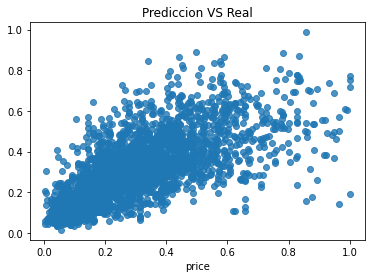

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


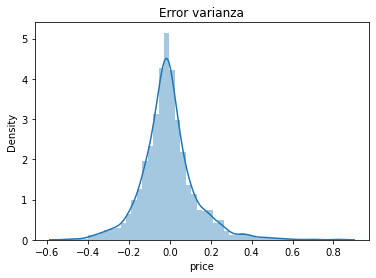

In [ ]:
prediction_test = model1.predict(X_test)
prediction_train = model1.predict(X_train)
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 1100, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 505, 1000, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:

model = RandomForestRegressor()

model2 = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

model2.fit(X_train, y_train)

pred_train = model2.predict(X_train)


pred_val = model2.predict(X_val)

print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished



Training MSE: 0.0114
Validation MSE: 0.0185

Training r2: 0.7349
Validation r2: 0.5452


In [ ]:
model2.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'bootstrap': True}

In [ ]:
model3=RandomForestRegressor(bootstrap= True, max_depth=1000,
 max_features= 'sqrt',
 min_samples_leaf=2,
 min_samples_split=5,
 n_estimators=1100)
model3.fit(X_train, y_train)


RandomForestRegressor(max_depth=1000, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1100)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.09,0.02,0.12,0.437,0.299,0.57,0.82


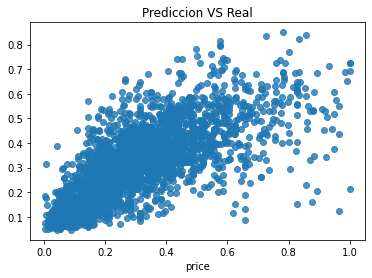

d:\Anaconda\Nueva carpeta\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


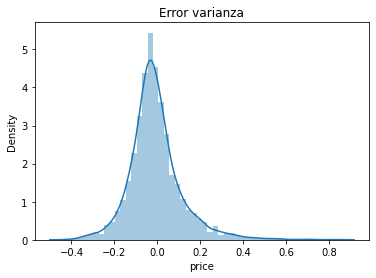

In [ ]:
prediction_test = model3.predict(X_test)
prediction_train = model3.predict(X_train)
show_metrics(prediction_test, prediction_train, y_test, y_train)
    
sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
plt.title('Prediccion VS Real')
plt.show()

sns.distplot(y_test - prediction_test, bins = 50)
plt.title('Error varianza')
plt.show()

In [127]:
#se guarda el modelo con pickle
import pickle
pickle.dump(modelLR, open('model.pkl','wb'))
pickle.dump(normalizador2, open('normalizador2.pkl','wb'))

In [ ]:
X

,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
9794,40.377270,-3.778590,1,1.0,1.0,4.76,0.0,0.0,1.0,0.0
5112,40.407050,-3.691800,3,1.0,3.0,4.78,1.0,0.0,0.0,0.0
8562,40.409740,-3.710910,4,1.0,1.0,4.67,1.0,0.0,0.0,0.0
8092,40.433470,-3.644690,1,1.0,1.0,5.00,0.0,0.0,1.0,0.0
4659,40.411150,-3.709230,4,1.0,2.0,4.75,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14875,40.409753,-3.699805,1,2.0,1.0,4.50,0.0,0.0,1.0,0.0
7748,40.424320,-3.685880,4,2.0,4.0,4.42,1.0,0.0,0.0,0.0
13873,40.413128,-3.704704,2,1.0,1.0,4.83,0.0,0.0,1.0,0.0
10294,40.409840,-3.717840,2,1.0,1.0,4.74,0.0,0.0,1.0,0.0


In [129]:
X

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
0,40.457240,-3.676880,2,1.0,1.0,4,1125,4.87,0.0,0.0,1.0,0.0
1,40.403810,-3.741300,1,1.0,1.0,4,40,4.58,0.0,0.0,1.0,0.0
2,40.389750,-3.690180,1,1.0,1.0,3,1125,4.71,0.0,0.0,1.0,0.0
3,40.414760,-3.704180,2,1.0,2.0,5,180,4.63,1.0,0.0,0.0,0.0
4,40.412590,-3.701050,2,1.0,1.0,3,730,4.38,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15054,40.431430,-3.676130,1,1.0,1.0,1,150,5.00,0.0,0.0,1.0,0.0
15055,40.470997,-3.579028,1,1.0,1.0,1,365,4.00,0.0,0.0,1.0,0.0
15056,40.436076,-3.702151,4,2.0,3.0,1,1125,5.00,1.0,0.0,0.0,0.0
15057,40.496844,-3.686277,2,1.0,1.0,1,365,5.00,0.0,0.0,1.0,0.0


In [130]:
X.describe()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,Entire home/apt,Hotel room,Private room,Shared room
count,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000,15059.000000
mean,40.420765,-3.694744,3.196427,1.421675,1.992297,6.194568,645.181885,4.606972,0.647254,0.005777,0.333355,0.013613
std,0.022483,0.026971,1.828207,0.766909,1.370987,33.365166,1252.556616,0.600008,0.477840,0.075791,0.471428,0.115882
min,40.332210,-3.835330,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.409350,-3.707470,2.000000,1.000000,1.000000,1.000000,100.000000,4.500000,0.000000,0.000000,0.000000,0.000000
50%,40.418860,-3.701200,3.000000,1.000000,2.000000,2.000000,365.000000,4.750000,1.000000,0.000000,0.000000,0.000000
75%,40.429210,-3.687745,4.000000,2.000000,3.000000,3.000000,1125.000000,4.920000,1.000000,0.000000,1.000000,0.000000
max,40.520140,-3.552786,16.000000,18.000000,40.000000,1125.000000,142365.000000,5.000000,1.000000,1.000000,1.000000,1.000000
